# Webinar 14 - Unsupervised Learning
- 19.30 - 19.35 Pengumuman
- 19.35 - 20.30 Materi Sesi 1
- 20.30 - 20.40 Break
- 20.40 - 21.15 Materi Sesi 2
- 21.15 - 21.30 QnA

Informasi Penugasan LMS:
Berikut detail tugas yang harus dikerjakan:
- Post Test Machine Learning Mastering AI Batch 2 (Deadline, Jumat 19 Januari 2024 Pukul 23.59 WIB)
- Pre Test Deep Learning Mastering AI Batch 2 (Deadline, Jumat 19 Januari 2024 Pukul 23.59 WIB)

## Recap so Far
- AI - Machine Learning - Deep Learning
- Math behind Machine Learning
- Machine Learning Supervised
  - Regression
    - Linear Regression
  - Classification
    - Logistic Regression
    - Decision Tree
    - KNN
    - Support Vector Machines
- Machine Learning Unsupervised --> KITA DISINI
  - Clustering
  - Anomaly Detection
  - Dimensionality Reduction
***
- Deep Learning

# Unsupervised Learning


## Introduction to Unsupervised Learning

Unsupervised learning is a type of machine learning where the model learns from data without any explicit supervision. In other words, it's like a baby learning to identify different animals. No one tells the baby, "This is a dog," or "That's a cat." Instead, the baby observes various features, like size, shape, sound, and behavior, and gradually learns to distinguish between different animals.

In the same way, unsupervised learning algorithms discover hidden patterns or data groupings without the need for human intervention. They're used when we have a lot of data, but we don't know what to look for, or when we're not sure what the output should be.

In unsupervised learning, we are given a dataset like this with only $x$, but not the target label $y$. That's why when we plot a data set, it looks like this as below, only with dots instead of two classes denoted by $x$.

![unsupervised](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/unsupervised-min.png)

Since we don't have a target label $y$, we can't tell the algorithm what the “**correct answer** ($y$)” is that we want to predict. Instead, we will ask the algorithm to discover something interesting about the data.

## Types of Unsupervised Learning

There are three main types of unsupervised learning: clustering, Anomaly Detection and Dimensionality Reduction.

1. **Clustering**

    Imagine you have a basket full of different fruits mixed together, and you want to separate them by type. Clustering algorithms would analyze the characteristics of each fruit (like size, color, shape) and group similar fruits together.

    Clustering is a technique used to group data points or items into several groups (clusters) based on their similarity. The goal is to partition the data into sets such that the data points in the same set are similar to each other and different from the data points in other sets.


2. **Anomaly Detection**

    Suppose a credit card company is trying to spot suspicious transactions to prevent fraud. These transactions stick out because they're different from usual behavior. They use a method called anomaly detection to do this.

    Anomaly detection is like a detective. It hunts for things that are rare or unusual. In the case of the credit card company, it raises a flag when it detects uncommon transactions, which might mean someone is using the card fraudulently.
    

3. **Dimensionality Reduction**

    Let's take a file compression as an example, we can reduce the size of a file, a movie for example into a smaller size using Winzip or WinRAR for example.
   Dimensionality reduction is similar in process. In machine learning, we usually have a lot of features, some of which we can merge together, remember Feature Engineering? So let's say we have 1000 features that we can merge to let's say 100. This will greatly speed up the training process because we have smaller amount of data to process and we still retain the important features.


## Applications of Unsupervised Learning

Unsupervised learning has a wide range of applications, including:

- **Clustering**: Customer Segmentation in marketing uses clustering to group data points together. The marketing team can then find the right customer group that matches their products and focus the marketing effort on that customer group to maximize profit.

- **Anomaly detection**: Detecting fraudulent transactions in banking to identify unusual data points in datasets. An unusual credit card transactions done outside the country while most transactions are inside the country may warrant confirmation to the customer if their credit card data have been stolen.

- **Association mining**: Discovering interesting relationships in large datasets. For example, in a supermarket transaction database, we might find that if a customer buys bread, they also buy butter. In this case, the supermarket can then put butter next to bread or vice versa to improve their profit.


## Clustering

Imagine you have a box of mixed candies of different colors and shapes. Clustering is like sorting these candies into different bowls based on their color or shape.

Clustering is a technique used in unsupervised machine learning to group similar data points together and separate them from other groups of data points. The goal is to partition the data into sets such that the data points in the same set (or cluster) are similar to each other and different from the data points in other sets.

In the context of machine learning, clustering is used to find patterns and structures in data that are hard to find manually, but can be useful in further analysis. It's often used in exploratory data analysis, where you don't necessarily know what you're looking for.

Let's start with the most well-known clustering algorithm, `K-means Clustering`.

### K-means Clustering

It works by selecting 'k' number of centroids (center points) and assigning each data point to the nearest centroid. The centroids are then moved to the average point of all the data points assigned to them, and the process is repeated until the centroids no longer move significantly. Let's see it in action.

In [ ]:
#in local environment you may need to install ipywidgets first

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from ipywidgets import interact, IntSlider

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0) #change random_state=None for truly random data.

def kmeans_animation(n_clusters):
    fig, ax = plt.subplots()

    # Initialize centroids randomly
    centroids = X[np.random.choice(len(X), size=n_clusters)]

    def animate(i):
        nonlocal centroids

        # Assign each data point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Calculate new centroids as the mean of the current clusters
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        ax.clear()
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)

        # Plot the centroids
        ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
        for (j, k), (l, m) in zip(centroids, new_centroids):
            ax.arrow(j, k, l-j, m-k, color='red', width=0.02)

        centroids = new_centroids

    anim = FuncAnimation(fig, animate, frames=20, interval=500) #the loop is controlled by the frames parameter
    plt.close(fig)

    return HTML(anim.to_jshtml())

interact(kmeans_animation, n_clusters=IntSlider(value=4, min=2, max=10, step=1, description='n_clusters:'));

interactive(children=(IntSlider(value=4, description='n_clusters:', max=10, min=2), Output()), _dom_classes=('…

Don't worry about the code for now, it's for quick animation to help you get the intuition behind the algorithm, later on we'll write our own code.

Note that the data points remains the same for educational purposes, however the centroids are put on the graph randomly. You can adjust the 'k' number of centroids using the slider, the ideal is 4 as presented, you can adjust it using the slider.

You can try running the animation multiple times by pressing the "Run" button on the Code block and see how the "centroids" move from its random location towards its ideal location.

Now, here's what's happening:

1. First we define how many centroids we want to use to group the data points together. In this case, it's 4.
2. Next the centroids are put randomly around the data.
3. Then each data points distance to every centroids are measured.
4. Based on the distance, the data points are assigned to a centroid based on the closest distance to that centroid. Try checking on the color and see if it indeed matched this step.
5. The centroids then calculates the Mean of all the data points associated with it.
6. The centroids will then move towards the Mean as you can see it's marked with a line pointing out of the centroids.
7. We then loop back to point 3 and repeat the process.
8. We stop the process when the Mean is the very close or the same as the previous one or a maximum loop is reached, whichever is reached first. In the above code, the loop stops at 20.

We can now generalize how the algorithm works into 4 distinct steps:

1. **Initialization**: Start by randomly initilize $K$ cluster centroids ($\mu_1, \mu_2, \cdots , \mu_k$). These can be randomly selected from the data points or created in the data space. Each centroid represents the center of a cluster.

2. **Assignment**: Assign each data point to the nearest centroid. "Nearest" is typically determined using distance metrics. This step will create $K$ clusters of data points.

3. **Update**: Recalculate the centroids by finding the Mean (average) of all data points in each cluster. This Mean value becomes the new centroid for the cluster.

4. **Repeat**: Repeat steps 2 and 3 until the centroids do not change significantly, or a predefined number of iterations have been reached. When the algorithm reaches this point it is said to have "converged".

**Case Study:**

Let's consider a retail store case for our clustering study example. Suppose a large retail store wants to understand the buying behavior of their customers in order to provide them with a personalized shopping experience. They have collected data about the annual income (in thousands of dollars) and the annual spend (in hundreds of dollars) of 30 customers. The annual income is represented by $x1$, and the annual spend by $x2$.

| Customer | Annual Income ($x1$) | Annual Spend ($x2$) |
| -------- | ----------------- | ----------------- |
| 1 | 7.29 | 2.75 |
| 2 | 6.20 | 2.68 |
| 3 | 5.39 | 2.27 |
| 4 | 5.67 | 2.96 |
| 5 | 6.60 | 3.07 |
| 6 | 7.76 | 3.16 |
| 7 | 6.63 | 3.15 |
| 8 | 5.77 | 3.14 |
| 9 | 5.99 | 2.76 |
| 10 | 6.38 | 2.65 |
| 11 | 5.74 | 3.10 |
| 12 | 4.62 | 2.79 |
| 13 | 5.34 | 3.04 |
| 14 | 5.37 | 2.82 |
| 15 | 5.04 | 2.92 |
| 16 | 5.53 | 3.34 |
| 17 | 6.05 | 2.81 |
| 18 | 5.13 | 2.20 |
| 19 | 5.73 | 2.88 |
| 20 | 6.78 | 3.06 |
| 21 | 6.45 | 3.35 |
| 22 | 6.40 | 2.90 |
| 23 | 5.86 | 3.00 |
| 24 | 6.45 | 3.17 |
| 25 | 5.37 | 3.20 |
| 26 | 5.89 | 3.35 |
| 27 | 3.96 | 2.72 |
| 28 | 6.28 | 3.17 |
| 29 | 4.21 | 2.82 |
| 30 | 5.33 | 3.03 |

**Objective:**

Maximize sales by targeting the right customers with more attractive personalized offers or setting the layout of the store accordingly, for example. The store assumes that different clusters may exhibit different buying behaviours. The store has hired you to provide them with customer segmentation based on the provided data. Your task is to use the K-means clustering algorithm to find the ideal clusters of customers. They can then study these clusters to understand the trend and make essential business decisions.

We could interpret these two clusters in the context of the retail store as follows:

1. **Income-Sensitive**: This cluster includes customers whose spending is strongly influenced by their income. They tend to spend most of their income on shopping, regardless of income. For example, if income increases, expenses will also likely increase, and vice versa.

2. **Income-Insensitive**: Customers in this cluster tend to spend a fixed amount of money, no matter what their income is. For example, they may always spend a certain amount on shopping each year, no matter whether their income rises or falls.

So, in this case we set k = 2, because we want to split the data into 2 customer segments (groups).

Now let's check the implementation using the example data set we have.

In [ ]:
import numpy as np

X = np.array([[7.29, 2.75],
              [6.20, 2.68],
              [5.39, 2.27],
              [5.67, 2.96],
              [6.60, 3.07],
              [7.76, 3.16],
              [6.63, 3.15],
              [5.77, 3.14],
              [5.99, 2.76],
              [6.38, 2.65],
              [5.74, 3.10],
              [4.62, 2.79],
              [5.34, 3.04],
              [5.37, 2.82],
              [5.04, 2.92],
              [5.53, 3.34],
              [6.05, 2.81],
              [5.13, 2.20],
              [5.73, 2.88],
              [6.78, 3.06],
              [6.45, 3.35],
              [6.40, 2.90],
              [5.86, 3.00],
              [6.45, 3.17],
              [5.37, 3.20],
              [5.89, 3.35],
              [3.96, 2.72],
              [6.28, 3.17],
              [4.21, 2.82],
              [5.33, 3.03]])

print('The shape of X is:', X.shape)

The shape of X is: (30, 2)


#### Initializing cluster centroid

The first step of the K means clustering algorithm, is to choose a random location as an initial guess for the cluster centroid $\mu_1$ through $\mu_k$.

The most common way is to randomly select from the available data points. In this example case we select the 3rd data (index 2) and the 16th data (index 15).

The alternative is to just set it to random as in the visualization above. However there are some issues:
1. If you tried running it multiple times, you may find that sometimes the centroids are not aligned with the four groups, one cluster can have two centroids on it while two clusters are attached to one centroid. Meaning, it failed to find the optimum result. K-means is sensitive to initial points.
2. By randomizing the initial location, the algorithm may take longer to converge. Again, if you try the visualization above multiple times, you'll find that sometimes it takes more than 4-5 steps and may even exceed 20 steps.

In [ ]:
initial_centroids = np.array([[5.39, 2.27], [5.53, 3.34]])

print('The shape of initial centroids is:', initial_centroids.shape)

The shape of initial centroids is: (2, 2)


Let's visualize the data

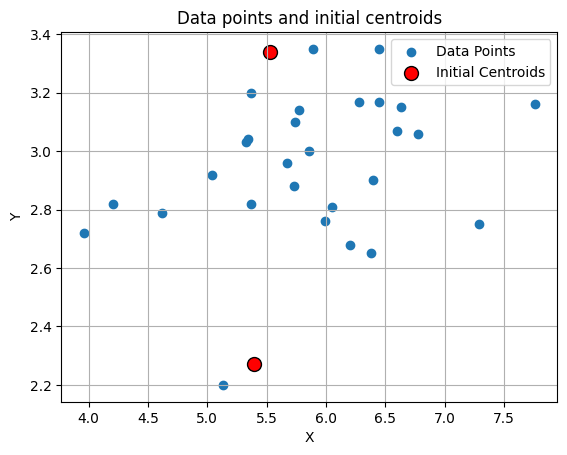

In [ ]:
import matplotlib.pyplot as plt

# Data points
plt.scatter(X[:, 0], X[:, 1], label='Data Points')

# Initial centroids
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1],
            color='red', s=100, edgecolor='k', label='Initial Centroids')

plt.title('Data points and initial centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

#### Finding the closest centroids

The next step we will take is to assign each data point to the nearest centroid. To do this, we simply measure the distance between each data points with every centroids.

Let's define the variable `x` as our data point and `i` as our data points index. Since the centroids is actually the Mean, we'll define "$\mu$" as our centroid data point and `j` as our centroids index. Now we have "$x_i$" which represents our data point at index `i` and "$\mu_j$" represents our centroid point at index `j`.

For example $x_1$ is the data point `[7.29, 2.75]`; $x_2$ is the data point `[6.20, 2.68]` and so on.

The same for $\mu_1$ is the centroid point `[5.39, 2.27]` and $\mu_2$ is the centroid point `[5.53, 3.34]`.

We'll then iterate over our `x` data points and for each data points "$x_i$", we'll measure the distance to each centroids "$\mu_j$" by using the `Euclidean norm`, that calculates the Euclidean distance between two vectors. And find the closest centroid index `j`.

To make sure that we group close data points together around the centroid, and avoid data points that are far away, we square the Euclidean distances, which is like using a magnifying glass on the distances. Small distances look a bit bigger and big distances look way bigger. This helps the algorithm to do a better job of putting the right data points in the right centroid.

We can generalize this by writing it in a formula:

$$c_{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x_{(i)} - \mu_j||^2,$$

where
 * $c_{(i)}$ is the index of the centroid that is closest to $x_{(i)}$ (corresponds to `idx[i]` in the code below), and
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the code below)
 * $||x_{(i)} - \mu_j||$ is the Euclidean distance

Now let's put this into Python code:

We'll create `find_closest_centroids` function which will takes the all the points as well the centroid locations and do a loop to try and find which centroids is closest to data.

Once we find the closest index, we'll then store the centroids index for each data points using a one-dimensional array.

For example:
- The 1st data point ($x_{(1)}$) is closer to $\mu_1$, meaning we can say $c_{(1)}$ = 1.
- The 2nd data point ($x_{(2)}$) is closer to $\mu_0$, meaning we can say $c_{(2)}$ = 0.
- The 3rd data point ($x_{(3)}$) is closer to $\mu_0$, meaning we can say $c_{(3)}$ = 0.

We'll store this into the array like this: `[1 0 0]`

We can use Numpy functions `np.linalg.norm` to calculate the norm and `np.argmin` to find the index of the minimum value.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
      distance = []
      for j in range(centroids.shape[0]):
        norm_ij = np.linalg.norm(X[i] - centroids[j])
        distance.append(norm_ij)

      idx[i] = np.argmin(distance)

    return idx

In [ ]:
# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print the closest centroids for the first three elements
print("The shape of idx is:", idx.shape[0])
print("First three elements in idx are:", idx[:3])
print("All elements in idx are:", idx)

The shape of idx is: 30
First three elements in idx are: [1 0 0]
All elements in idx are: [1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1]


From the results above we can see that every data point we have has been assigned to the nearest centroid. This is proven by having the same 30 data inside both `idx` and `X`.

#### Computing the centroid means

Now that we have map the data points to the centroids, we can do the next step which is calculating the Means for each centroids.

I'm sure we all know how to calculate the Mean which is the sum of all the data divided by the number of data.

We can write the formula like this:
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$

where
* $C_k$ is the set of examples that are assigned to centroid $k$
* $|C_k|$ is the number of examples in the set $C_k$

Concretely, if two examples say $x_{(3)}$ and $x_{(5)}$ are assigned to centroid $k=0$,
then by inputting the data into the formula, we get $\mu_0 = \frac{1}{2}(x_{(3)}+x_{(5)})$.

Now we can write our Python code:

In [ ]:
def compute_centroids_means(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))

    for k in range(K):
      points = X[idx == k]
      centroids[k] = np.mean(points, axis = 0)

    return centroids

In [ ]:
K = initial_centroids.shape[0]
centroids = compute_centroids_means(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[5.12714286 2.59      ]
 [6.0573913  3.04913043]]


In [ ]:
initial_centroids

array([[5.39, 2.27],
       [5.53, 3.34]])

So, based on the results above, we succeeded in getting a new centroid by calculating the average of the data points determined for each centroid in the form `[5.12714286, 2.59]` and `[6.0573913, 3.04913043]`

#### Data analysis using K-means

Now we are ready to put all of them together (again) into a loop that will find the best centroids location. Which we'll put into the `kMeans` function below. The `kMeans_progress` function is used to create the animation, so you can skip this in the real implementation of K-means.

Now, let's find out the clusters for **the annual income** and **the annual spend**. Where, this function will call the 2 functions that we created previously.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines

def kMeans_progress(X, centroids, previous_centroids, idx, K, i):
    # Define colormap
    cmap = ListedColormap(["red", "blue"])
    c = cmap(idx)

    # Draw a line from the previous centroid to the current centroid
    for cent_idx in range(centroids.shape[0]):
        plt.plot([previous_centroids[cent_idx, 0], centroids[cent_idx, 0]], [previous_centroids[cent_idx, 1], centroids[cent_idx, 1]], '-k', linewidth=1)

    # Plot the examples
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    plt.title("Iteration number %d" % i)

    # Create a red circle for the Low Spenders legend entry
    red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Income-Sensitive')

    # Create a blue circle for the High Spenders legend entry
    blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Income-Insensitive')

    # Add legend
    plt.legend(handles=[red_circle, blue_circle])

def kMeans(X, initial_centroids, max_iters=5, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            kMeans_progress(X, centroids, previous_centroids, idx, K, i)

            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids_means(X, idx, K)


    # Set the y-axis label
    plt.ylabel('Annual Spend in hundreds of dollars (x2)')
    # Set the x-axis label
    plt.xlabel('Annual Income in thousands of dollars (x1)')
    plt.show()
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


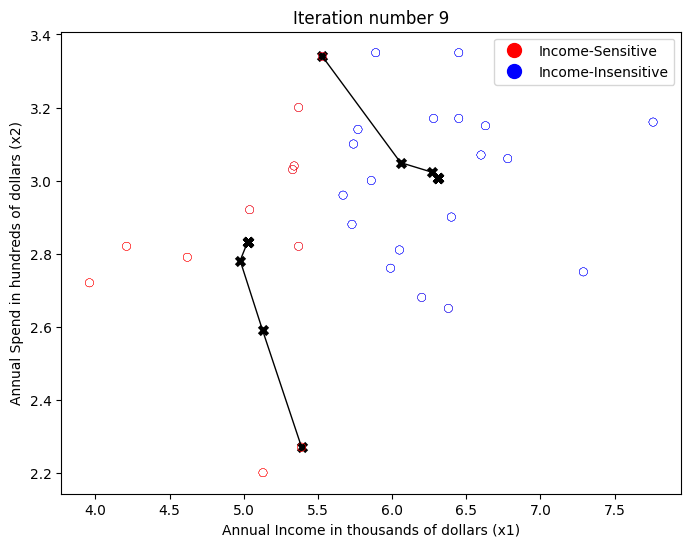

In [ ]:
# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = kMeans(X, initial_centroids, max_iters, plot_progress=True)

From the K-means analysis and visualization above, we can draw the following conclusions:

1. **Income-Sensitive Customers (red cluster):** This group includes consumers with low to medium annual income. They tend to spend a large portion of their income on shopping, meaning their spending habits are heavily influenced by how much income they have. If their income rises, they will spend more, and if their income falls, they will spend less. Retailers can design sales strategies or special offers that suit this group, such as providing discounts or other economical offers.

2. **Income-Insensitive Customers (blue cluster):** This group includes consumers with medium to high annual incomes. In contrast to the previous group, consumers in this group tend to have fixed or consistent shopping patterns, no matter what their income. So, they may have a fixed annual spending budget. Even when their income rises, they may not increase their spending budget, and vice versa. For retailers, these consumers may be more interested in the value and quality of goods than price. They can target this group with premium or exclusive products.

### Inference

What if we have new data ? This depends on the use case, we can integrate the new data into the training set and re-train the model or we can simply find out if the data belongs to any of the clusters, also called inference process. The re-train is quite straight forward, we just append the data to our old dataset and run the training process.

How about the inference process where we want to know which cluster the new data belongs to?

Let's say our data as `[6.5, 3.1]` which should falls somewhere inside the Income-Insensitive (blue on the chart above), with the cluster index of 1. Visually we can see it using this chart:

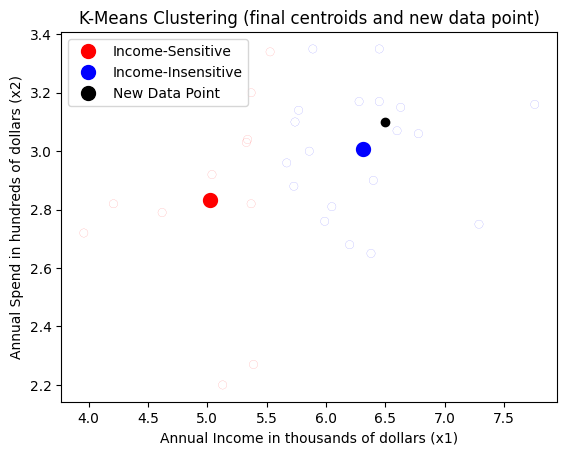

In [ ]:
# Here's our new data
new_data = np.array([[6.5, 3.1]])

# Define colormap
cmap = ListedColormap(["red", "blue"])
c = cmap(idx)

# Plot the examples
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

# Plot the new data point in black
plt.scatter(new_data[0, 0], new_data[0, 1], color='black')

# Plot the centroids as large dots, colored according to the data points
for i, centroid in enumerate(centroids):
    color = cmap(i)
    plt.scatter(centroid[0], centroid[1], marker='o', color=color, linewidths=5)

# Set the axis labels and title
plt.ylabel('Annual Spend in hundreds of dollars (x2)')
plt.xlabel('Annual Income in thousands of dollars (x1)')
plt.title('K-Means Clustering (final centroids and new data point)')

# Create a red circle for the Low Spenders legend entry
red_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Income-Sensitive')

# Create a blue circle for the High Spenders legend entry
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='Income-Insensitive')

# Create a black circle for the new data point legend entry
black_circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='New Data Point')

# Add legend
plt.legend(handles=[red_circle, blue_circle, black_circle])

plt.show()

How does the model knows it belongs to cluster index 1 (blue) and not cluster index 0 (red) ?
Well, if we recall, the data points are grouped according to the distance to the closest centroids, so we can do the same here. We already have a function for that, `find_closest_centroids()`, so let's use that.

>Note: To make sure we have the right index, you can go up to the section `Initializing Cluster Centroid` and check where the index there.

In [ ]:
# Use the final centroids to find the closest centroid for the new data point
idx_new = find_closest_centroids(new_data, centroids)

print(f"The new data point belongs to cluster: {idx_new[0]}")

The new data point belongs to cluster: 1


### Other types of Clustering

There are other types of clustering algorithms:

1. **Hierarchical Clustering**: This algorithm starts by treating each data point as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This hierarchical process continues until all the clusters are merged together. The result is shown in the Dendogram plot. Here's a good resource if you are interested in learning more about Hierarchical Clustering: [Hierarchical Clustering - Fun and Easy Machine Learning](https://youtu.be/EUQY3hL38cw?si=1LKbhilHY3wUA6ko)

![Hierarchical Clustering](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*cLofDia-J3cCfHIS6MPS3Q.png)

Source: [Miro - Medium](https://pub.towardsai.net/fully-explained-hierarchical-clustering-with-python-ebb256317b50)

2. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm defines clusters as continuous regions of high density. It's great for tasks where you don't know how many clusters there will be. DBSCAN starts with an arbitrary starting data point, and if a sufficient number of points are close to it, a cluster is started. The algorithm then iteratively adds points that are within a certain distance in the cluster. We won't cover this in more detail. Here's what DBSCAN looks like:

![DBSCAN in Python](https://camo.githubusercontent.com/4a5e97b47190f2f1c5e90a0d33beaa2a016ae75e1e39654f10f0e4541e014304/68747470733a2f2f64313768323774366835313561352e636c6f756466726f6e742e6e65742f746f706865722f323031372f4a756c792f35393631366261645f73637265656e2d73686f742d323031372d30372d30382d61742d342e33322e32322d706d2f73637265656e2d73686f742d323031372d30372d30382d61742d342e33322e32322d706d2e706e67)

Source: [https://github.com/chriswernst/dbscan-python/blob/master/README.md](https://github.com/chriswernst/dbscan-python/blob/master/README.md)

If you want to learn more, here's a good resource: [Clustering with DBSCAN, Clearly Explained](https://youtu.be/RDZUdRSDOok?si=G0hl-WcnAjwRMY18)